In [50]:
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
from kmodes import kmodes

In [51]:
df = pd.read_csv('features_of_words 1.csv', index_col=0)
wordle = pd.read_csv('wordle_features.csv', index_col=0)
df1 = pd.get_dummies(data=df, columns=['rep_letter'])
wordle1 = pd.get_dummies(data=wordle, columns=['rep_letter'])
wordle1

,Freq,leven,rep_sum,any_abnormal,rep_letter_a,rep_letter_aa,rep_letter_b,rep_letter_c,rep_letter_d,rep_letter_e,...,rep_letter_m,rep_letter_n,rep_letter_o,rep_letter_p,rep_letter_r,rep_letter_s,rep_letter_t,rep_letter_u,rep_letter_v,rep_letter_y
manly,38.0,4.6,0.0,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
molar,1.0,4.0,0.0,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
havoc,10.0,4.6,0.0,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
impel,1.0,4.8,0.0,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
condo,0.0,4.6,1.0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
drink,680.0,4.8,0.0,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
query,26.0,4.6,0.0,1.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
gorge,11.0,3.8,1.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
crank,3.0,4.2,0.0,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
'''km = kmodes.KModes(n_clusters=4)
clusters = km.fit_predict(wordle)'''

'km = kmodes.KModes(n_clusters=4)\nclusters = km.fit_predict(wordle)'

In [53]:
'''def kmodes_score(X, clusters):
    K=range(2,clusters+1)
    S=[]
    for k in K:
        km = kmodes.KModes(n_clusters=k)
        Y = km.fit_predict(X)
        score = np.sum(Y[:int(len(Y)/2)])+(len(Y)/2-np.sum(Y[int(len(Y)/2):]))
        score = score/len(Y)
        if score >= 0.5:
            i = score
        else:
            i = 1-score
        S.append(i)
    plt.plot(K, S, 'b*-')
    plt.xlabel('k')
    plt.ylabel('score')
    
    plt.show();

kmodes_score(wordle, 15)'''

"def kmodes_score(X, clusters):\n    K=range(2,clusters+1)\n    S=[]\n    for k in K:\n        km = kmodes.KModes(n_clusters=k)\n        Y = km.fit_predict(X)\n        score = np.sum(Y[:int(len(Y)/2)])+(len(Y)/2-np.sum(Y[int(len(Y)/2):]))\n        score = score/len(Y)\n        if score >= 0.5:\n            i = score\n        else:\n            i = 1-score\n        S.append(i)\n    plt.plot(K, S, 'b*-')\n    plt.xlabel('k')\n    plt.ylabel('score')\n    \n    plt.show();\n\nkmodes_score(wordle, 15)"

In [54]:
'''df1_scale = preprocessing.scale(df1[['Freq','leven']])
df1_scale_df = pd.DataFrame(df1_scale, columns = df1[['Freq','leven']].columns, index=df1[['Freq','leven']].index)
df1_scale_df = df1_scale_df.join(df1.drop(columns=['Freq','leven']))
df1_scale_df'''

'''df1_scale = preprocessing.scale(df1)
df1_scale_df = pd.DataFrame(df1_scale, columns = df1.columns, index=df1.index)
df1_scale_df'''

'''df1_log = df1.apply(lambda x: np.log(x+1) if x.name in ['Freq'] else x)
df1_log'''

wordle1 = wordle1.apply(lambda x: np.log(x+1) if x.name in ['Freq'] else x)

wordle1_scale = preprocessing.scale(wordle1[['Freq','leven']])
wordle1_scale_df = pd.DataFrame(wordle1_scale, columns = wordle1[['Freq','leven']].columns, index=wordle1[['Freq','leven']].index)
wordle1_scale_df = wordle1_scale_df.join(wordle1.drop(columns=['Freq','leven']))
#wordle1_scale_df = wordle1
'''wordle1_scale = preprocessing.scale(wordle1)
wordle1_scale_df = pd.DataFrame(wordle1_scale, columns = wordle1.columns, index=wordle1.index)'''
wordle1_scale_df



,Freq,leven,rep_sum,any_abnormal,rep_letter_a,rep_letter_aa,rep_letter_b,rep_letter_c,rep_letter_d,rep_letter_e,...,rep_letter_m,rep_letter_n,rep_letter_o,rep_letter_p,rep_letter_r,rep_letter_s,rep_letter_t,rep_letter_u,rep_letter_v,rep_letter_y
manly,0.211572,0.534706,0.0,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
molar,-1.193432,-0.640556,0.0,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
havoc,-0.387087,0.534706,0.0,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
impel,-1.193432,0.926461,0.0,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
condo,-1.521290,0.534706,1.0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
drink,1.564351,0.926461,0.0,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
query,0.037639,0.534706,0.0,1.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
gorge,-0.345931,-1.032311,1.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
crank,-0.865574,-0.248802,0.0,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


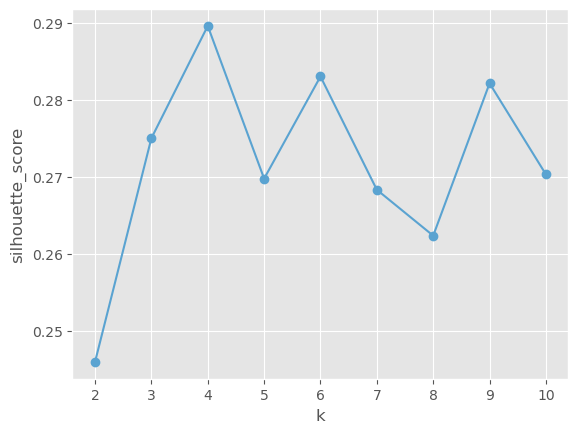

In [55]:
plt.style.use("ggplot")
def k_silhouette(X, clusters):
    K=range(2,clusters+1)
    S=[]
    for k in K:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X)
        labels=kmeans.labels_
        S.append(metrics.silhouette_score(X, labels, metric='euclidean'))
    plt.plot(K, S, 'o-', c="#5AA3D1")
    plt.xlabel('k')
    plt.ylabel('silhouette_score')
    
    plt.show();
    
#k_silhouette(df1_scale_df, 15)
#k_silhouette(df1, 15)
#k_silhouette(df1_log, 15)
k_silhouette(wordle1_scale_df, 10)

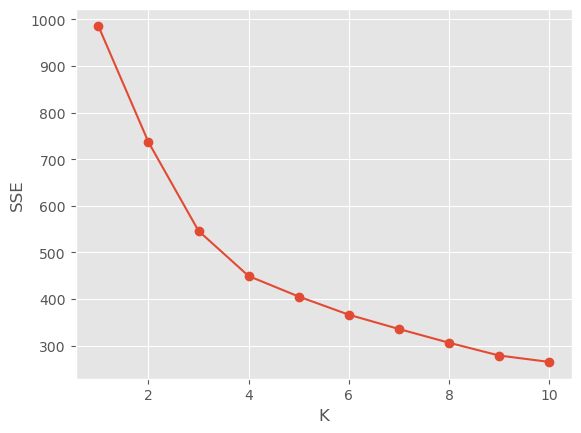

In [56]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    #kmeans.fit(df1_scale_df)
    kmeans.fit(wordle1_scale_df)
    sse.append(kmeans.inertia_)
x = range(1, 11)
plt.style.use("ggplot")
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(x, sse, 'o-')
plt.show()


In [57]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(wordle1_scale_df)

KMeans(n_clusters=4)

In [58]:
y_km = kmeans.fit_predict(wordle1_scale_df)


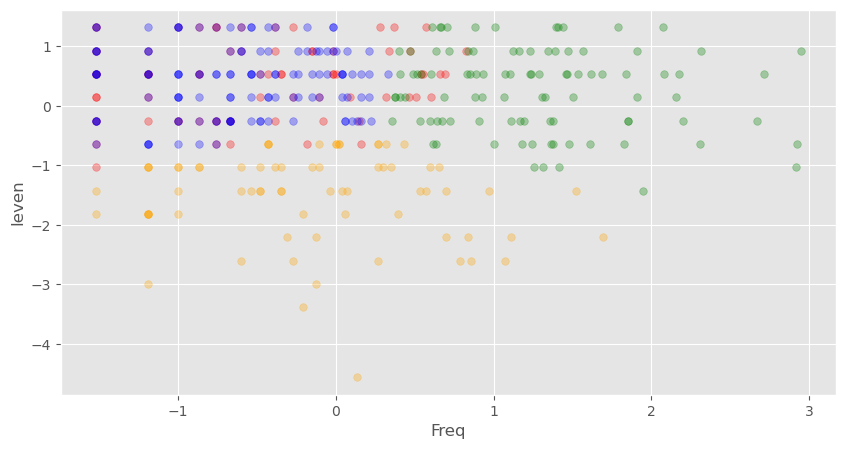

In [59]:
%matplotlib inline
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.set_xlabel('Freq')
ax.set_ylabel('leven')
ax.scatter(wordle1_scale_df[y_km ==0]['Freq'], wordle1_scale_df[y_km == 0]['leven'],s=30, c='red', alpha=.3)
ax.scatter(wordle1_scale_df[y_km ==1]['Freq'], wordle1_scale_df[y_km == 1]['leven'],s=30, c='orange', alpha=.3)
ax.scatter(wordle1_scale_df[y_km ==2]['Freq'], wordle1_scale_df[y_km == 2]['leven'],s=30, c='green', alpha=.3)
ax.scatter(wordle1_scale_df[y_km ==3]['Freq'], wordle1_scale_df[y_km == 3]['leven'],s=30, c='blue', alpha=.3)

In [60]:
wordle1_scale_df[y_km ==0].describe()

,Freq,leven,rep_sum,any_abnormal,rep_letter_a,rep_letter_aa,rep_letter_b,rep_letter_c,rep_letter_d,rep_letter_e,...,rep_letter_m,rep_letter_n,rep_letter_o,rep_letter_p,rep_letter_r,rep_letter_s,rep_letter_t,rep_letter_u,rep_letter_v,rep_letter_y
count,73.000000,73.000000,73.000000,73.000000,73.000000,73.0,73.000000,73.000000,73.000000,73.000000,...,73.000000,73.000000,73.000000,73.0,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000
mean,-0.521284,0.427376,1.082192,0.013699,0.082192,0.0,0.013699,0.041096,0.013699,0.178082,...,0.041096,0.013699,0.136986,0.0,0.027397,0.013699,0.095890,0.027397,0.013699,0.013699
std,0.705767,0.616867,0.276557,0.117041,0.276557,0.0,0.117041,0.199886,0.117041,0.385230,...,0.199886,0.117041,0.346212,0.0,0.164368,0.117041,0.296479,0.164368,0.117041,0.117041
min,-1.521290,-1.032311,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-1.193432,-0.248802,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-0.600876,0.534706,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-0.018072,0.926461,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.826133,1.318215,2.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [61]:
wordle1_scale_df[y_km ==3].describe()

,Freq,leven,rep_sum,any_abnormal,rep_letter_a,rep_letter_aa,rep_letter_b,rep_letter_c,rep_letter_d,rep_letter_e,...,rep_letter_m,rep_letter_n,rep_letter_o,rep_letter_p,rep_letter_r,rep_letter_s,rep_letter_t,rep_letter_u,rep_letter_v,rep_letter_y
count,119.000000,119.000000,119.0,119.000000,119.0,119.0,119.0,119.0,119.0,119.0,...,119.0,119.0,119.0,119.0,119.0,119.0,119.0,119.0,119.0,119.0
mean,-0.603696,0.426069,0.0,0.058824,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.521305,0.572325,0.0,0.236289,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,-1.521290,-0.640556,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,-1.001647,-0.052925,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,-0.600876,0.534706,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,-0.154146,0.926461,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.329095,1.318215,0.0,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


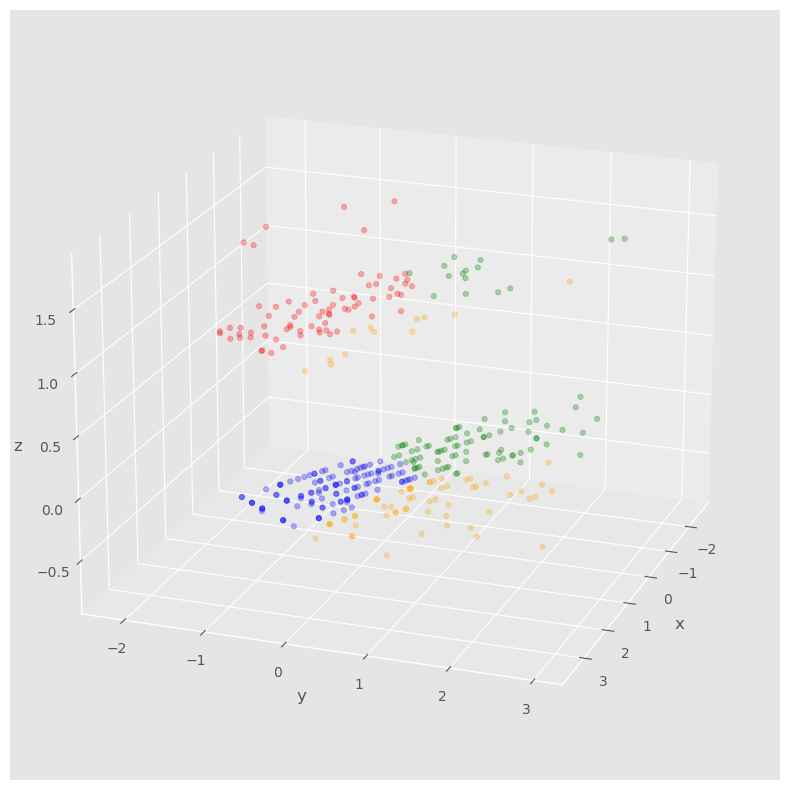

In [62]:
reduced_data = PCA(n_components=3).fit_transform(wordle1_scale_df)
reduced_data = pd.DataFrame(reduced_data)
%matplotlib inline
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(20, 20)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.scatter(reduced_data[y_km ==0][1], reduced_data[y_km == 0][0],
           reduced_data[y_km ==0][2],s=15, c='red', alpha=.3)
ax.scatter(reduced_data[y_km ==1][1], reduced_data[y_km == 1][0],
           reduced_data[y_km ==1][2],s=15, c='orange', alpha=.3)
ax.scatter(reduced_data[y_km ==2][1], reduced_data[y_km == 2][0],
           reduced_data[y_km ==2][2],s=15, c='green', alpha=.3)
ax.scatter(reduced_data[y_km ==3][1], reduced_data[y_km == 3][0],
           reduced_data[y_km ==3][2],s=15, c='blue', alpha=.3)

In [63]:
pca = PCA(n_components=3)
X = pca.fit_transform(wordle1_scale_df)
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3'], index=wordle1_scale_df.columns)
loadings

,PC1,PC2,PC3
Freq,0.770930,-0.619470,0.145343
leven,-0.613034,-0.784371,-0.090330
rep_sum,-0.127617,0.011328,0.710298
any_abnormal,-0.005175,-0.002566,-0.022106
rep_letter_a,-0.011985,0.010281,0.047323
rep_letter_aa,0.111015,-0.015459,-0.650316
rep_letter_b,-0.000192,-0.002088,0.006321
rep_letter_c,-0.011899,-0.000861,0.025649
rep_letter_d,0.000510,0.000715,0.012867
rep_letter_e,-0.001104,0.004860,0.134722


In [64]:
pca.explained_variance_ratio_

array([0.37362531, 0.36159719, 0.15901881])

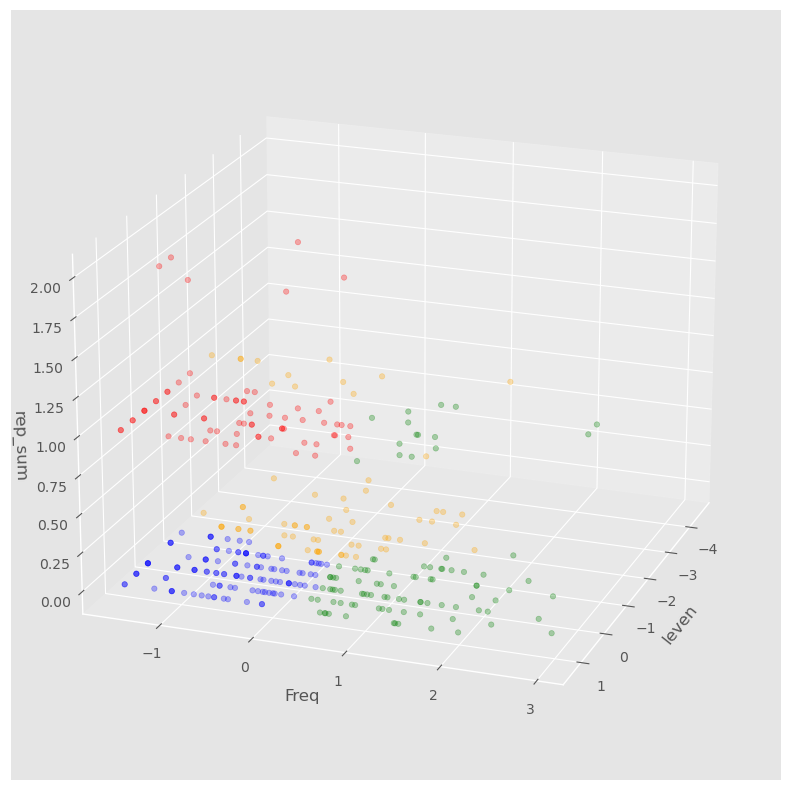

In [67]:
%matplotlib inline
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(20, 20)
ax.set_xlabel('leven')
ax.set_ylabel('Freq')
ax.set_zlabel('rep_sum')
ax.scatter(wordle1_scale_df[y_km ==0]['leven'], wordle1_scale_df[y_km == 0]['Freq'],
           wordle1_scale_df[y_km ==0]['rep_sum'],s=15, c='red', alpha=.3)
ax.scatter(wordle1_scale_df[y_km ==1]['leven'], wordle1_scale_df[y_km == 1]['Freq'],
           wordle1_scale_df[y_km ==1]['rep_sum'],s=15, c='orange', alpha=.3)
ax.scatter(wordle1_scale_df[y_km ==2]['leven'], wordle1_scale_df[y_km == 2]['Freq'],
           wordle1_scale_df[y_km ==2]['rep_sum'],s=15, c='green', alpha=.3)
ax.scatter(wordle1_scale_df[y_km ==3]['leven'], wordle1_scale_df[y_km == 3]['Freq'],
           wordle1_scale_df[y_km ==3]['rep_sum'],s=15, c='blue', alpha=.3)

In [84]:
wordle1.describe()

,Freq,leven,rep_sum,any_abnormal,rep_letter_a,rep_letter_aa,rep_letter_b,rep_letter_c,rep_letter_d,rep_letter_e,...,rep_letter_m,rep_letter_n,rep_letter_o,rep_letter_p,rep_letter_r,rep_letter_s,rep_letter_t,rep_letter_u,rep_letter_v,rep_letter_y
count,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,...,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000
mean,3.216262,4.327019,0.295265,0.033426,0.022284,0.721448,0.002786,0.011142,0.005571,0.052925,...,0.008357,0.005571,0.036212,0.005571,0.011142,0.011142,0.022284,0.008357,0.002786,0.002786
std,2.117118,0.511237,0.492122,0.179998,0.147812,0.448912,0.052778,0.105113,0.074535,0.224196,...,0.091158,0.074535,0.187077,0.074535,0.105113,0.105113,0.147812,0.091158,0.052778,0.052778
min,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.609438,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.995732,4.400000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.600145,4.600000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.445412,5.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [97]:
eerie = df1.loc[['eerie']]
eerie['Freq'] = np.log(1+eerie['Freq'])
eerie['Freq'] = (eerie['Freq'] - 3.216262)/2.117118
eerie['leven'] = (eerie['leven'] - 4.327019)/0.511237
eerie.drop(columns=['rep_letter_j', 'rep_letter_w', 'rep_letter_x', 'rep_letter_z'], inplace=True)
eerie_label = kmeans.predict(eerie)
eerie_label

array([3], dtype=int32)

In [ ]:
difficulty_label = pd.DataFrame(index=wordle1_scale_df.index, columns=['difficulty_label'])
difficulty_label[y_km==2] = 0
difficulty_label[y_km==1] = 1
difficulty_label[y_km==3] = 2
difficulty_label[y_km==0] = 3
difficulty_label.to_csv("difficulty_label1.csv")
difficulty_label

,difficulty_label
manly,2
molar,2
havoc,2
impel,2
condo,3
...,...
drink,0
query,2
gorge,1
crank,2


In [ ]:
def Levenshtein_Distance(a,b):
    l1,l2 = len(a),len(b)
    if min(l1,l2) == 0:
        return max(l1,l2)
    elif a[0] == b[0]:
        return Levenshtein_Distance(a[1:],b[1:])
    else:
        return 1 + min(Levenshtein_Distance(a[1:],b),Levenshtein_Distance(a,b[1:]),Levenshtein_Distance(a[1:],b[1:]))

In [ ]:
Levenshtein_Distance('abc','bda')

3